<font color="yellow" size="6">Support Vector Regression (SVR)</font>

Support Vector Regression (SVR) is best used in specific scenarios where its characteristics align with the problem at hand. 
Below are situations when SVR is a good choice:
1. Non-Linear Relationships

    When to Use: The relationship between input features and the target variable is non-linear, and the exact nature of the relationship is unknown.
    Why SVR: The kernel trick allows SVR to capture complex patterns in data by transforming it into higher dimensions (e.g., RBF kernel).

2. High-Dimensional Data

    When to Use: The dataset has a large number of features compared to the number of samples.
    Why SVR: SVR performs well in high-dimensional spaces because it focuses on a subset of the training data (support vectors), reducing overfitting risks.

3. Small to Medium-Sized Datasets

    When to Use: The dataset size is relatively small or moderate (e.g., hundreds to thousands of samples).
    Why SVR: SVR is computationally expensive for very large datasets because of its quadratic scaling with the number of samples.

4. Outlier Tolerance

    When to Use: The target variable has some outliers, but they should not dominate the regression model.
    Why SVR: The epsilon parameter in SVR defines a margin of tolerance for errors, making the model robust to small deviations or noise.

5. Focus on Prediction Accuracy Around a Margin

    When to Use: You care about getting predictions close to the true value within a specific tolerance, rather than minimizing errors absolutely.
    Why SVR: SVR minimizes error only when predictions fall outside the epsilon margin, allowing for more flexibility in modeling.

6. Feature Scaling is Feasible

    When to Use: The features can be easily standardized or scaled.
    Why SVR: SVR is sensitive to feature scaling, and proper standardization helps it perform optimally.

<b>When Not to Use SVR:</b>

    Very Large Datasets:
        SVR can be computationally expensive for datasets with millions of samples. Consider other scalable algorithms like Random Forests or Gradient Boosted Trees.

    Sparse or Categorical Data:
        SVR struggles with datasets that contain many categorical or sparse features. Tree-based models like XGBoost or CatBoost are better suited.

    Interpretability:
        If you need an interpretable model, SVR is not ideal. Linear regression or decision trees are easier to understand and explain.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the wine dataset
data = load_wine()
X = data.data  # Features
y = data.target  # Use 'target' (class label) for regression

# Optional: Use a specific feature as the target (e.g., 'Alcohol')
# y = data.data[:, 0]  # Uncomment to use 'Alcohol' content as the target variable

In [3]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the data (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Reshape y for StandardScaler
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

<b>SVR Configuration:</b>

    kernel='rbf': Radial Basis Function (RBF) kernel for non-linear regression.
    C=100: Regularization parameter.
    gamma=0.1: Kernel coefficient for RBF kernel.
    epsilon=0.1: Tolerance for error in the predictions.

In [5]:
# Define and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

SVR(C=100, gamma=0.1)

In [6]:
# Make predictions
y_pred_scaled = svr.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [7]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [8]:
print(f"Support Vector Regression on Wine Dataset")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R2 Score: {r2:.4f}")

Support Vector Regression on Wine Dataset
Mean Squared Error (MSE): 0.0274
R2 Score: 0.9530


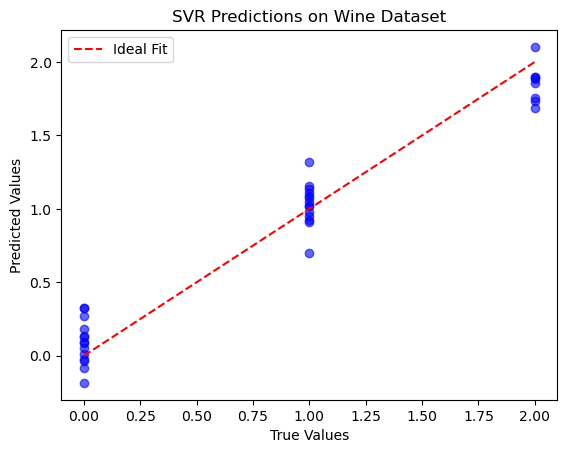

In [9]:
# Visualization: True vs Predicted Values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("SVR Predictions on Wine Dataset")
plt.legend()
plt.show()